<a href="https://colab.research.google.com/github/DaniloRiver/Seminario-de-Investigacion-UNAH/blob/main/Modelos_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Preliminares



In [34]:
#!pip install pycaret
#!pip install imbalanced-learn

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Cargando el Dataset Diabetes
from pycaret.datasets import get_data
url="https://raw.githubusercontent.com/DaniloRiver/Seminario-de-Investigacion-UNAH/main/diabetes.csv"
#datos= get_data("diabetes")
datos= pd.read_csv(url)
datos.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Clase 0: 500
Clase 1: 268
Proporcion: 1.87 :1


([<matplotlib.axis.XTick at 0x7f7c77728190>,
 [Text(0, 0, 'sin diabetes'), Text(0, 0, 'con diabetes')])

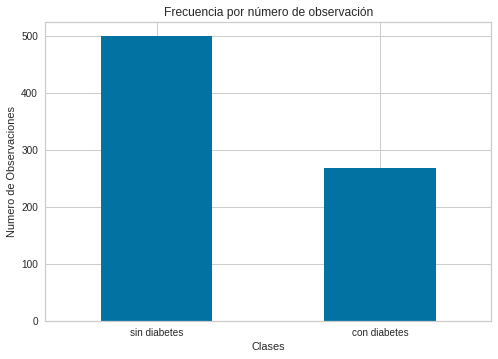

In [37]:
Conteo_datos= datos.Outcome.value_counts()
print("Clase 0:",Conteo_datos[0])
print("Clase 1:",Conteo_datos[1])
print("Proporcion:",round(Conteo_datos[0]/Conteo_datos[1],2),':1')
Conteo_datos.plot(kind="bar",title='Conteo (Datos)',rot=0)
plt.title("Frecuencia por número de observación")
plt.xlabel("Clases")
plt.ylabel("Numero de Observaciones")
plt.xticks(range(2),['sin diabetes','con diabetes'])

In [38]:
from pycaret.classification import *
clf= setup(data= datos,target="Outcome", session_id=123,silent=True)

,Description,Value
0,session_id,123
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [39]:
Mejor_modelo= compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7601,0.8032,0.5056,0.7048,0.5823,0.4217,0.4369,0.269
gbc,Gradient Boosting Classifier,0.7562,0.8239,0.5667,0.6731,0.6031,0.4314,0.4431,0.126
ada,Ada Boost Classifier,0.7526,0.8016,0.5889,0.6524,0.6091,0.4310,0.4394,0.108
lightgbm,Light Gradient Boosting Machine,0.7524,0.8028,0.5778,0.6614,0.6086,0.4299,0.4381,0.049
rf,Random Forest Classifier,0.7488,0.8035,0.5111,0.6849,0.5740,0.4023,0.4182,0.508
ridge,Ridge Classifier,0.7452,0.0000,0.4722,0.6844,0.5492,0.3816,0.3997,0.015
lda,Linear Discriminant Analysis,0.7452,0.7912,0.4833,0.6783,0.5563,0.3859,0.4017,0.018
knn,K Neighbors Classifier,0.7153,0.7261,0.5111,0.5962,0.5405,0.3379,0.3467,0.120
et,Extra Trees Classifier,0.7134,0.7573,0.4333,0.6079,0.4968,0.3072,0.3204,0.464
dt,Decision Tree Classifier,0.7075,0.6741,0.5722,0.5635,0.5630,0.3445,0.3481,0.019


In [40]:
# Preparando las variables X, y del modelo  X=Matriz de Predictores , y= variable de resultados  1: con diabetes , 0: sin diabetes
Diabetes= datos
variables_evaluadas = ['Pregnancies','Glucose','SkinThickness','BloodPressure','DiabetesPedigreeFunction','Age','BMI','Insulin']
X=Diabetes[variables_evaluadas]
y=Diabetes.Outcome

In [41]:
def plot_2d_space(X, y, label='Outcome'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

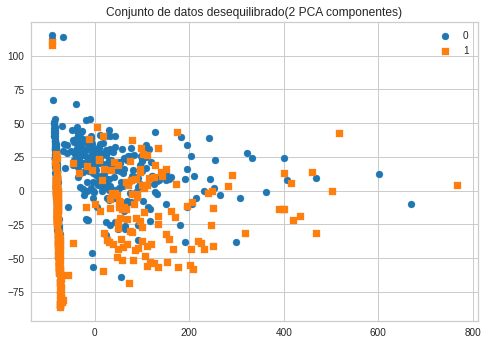

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot_2d_space(X_pca, y, 'Conjunto de datos desequilibrado(2 PCA componentes)')

#Over-sampling seguido por under-sampling

In [10]:
from imblearn.combine import SMOTEENN
X_resampled1, y_resampled1 = SMOTEENN(random_state=123).fit_resample(X, y)


Over-sampling seguido por under-sampling
1    303
0    219
Name: Outcome, dtype: int64


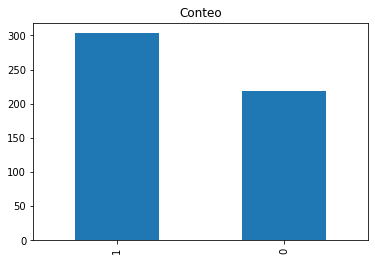

In [11]:
print('Over-sampling seguido por under-sampling')
print(y_resampled1.value_counts())
y_resampled1.value_counts().plot(kind='bar',title='Conteo')

In [12]:
dataset_smoteenn= X_resampled1
dataset_smoteenn['class']=y_resampled1
dataset_smoteenn.shape

(522, 9)

In [13]:
clf1= setup(data= dataset_smoteenn,target="class", session_id=123,silent=True)

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(522, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


**Regresion Logistica**

In [14]:
#Regresion Logistica
modelo1= create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9730,0.9939,0.9545,1.0000,0.9767,0.9445,0.9460
1,0.7568,0.9182,0.8182,0.7826,0.8000,0.4900,0.4908
2,0.8919,0.9394,1.0000,0.8462,0.9167,0.7658,0.7877
3,0.9730,1.0000,0.9545,1.0000,0.9767,0.9445,0.9460
4,0.8378,0.9636,0.9091,0.8333,0.8696,0.6563,0.6607
5,0.9167,1.0000,0.8636,1.0000,0.9268,0.8312,0.8433
6,0.9722,1.0000,1.0000,0.9565,0.9778,0.9408,0.9424
7,0.9444,0.9873,1.0000,0.9130,0.9545,0.8835,0.8896
8,0.8611,0.9492,0.9524,0.8333,0.8889,0.7059,0.7171
9,0.8333,0.9651,0.8571,0.8571,0.8571,0.6571,0.6571


In [15]:
evaluate_model(modelo1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

Arbol de Decision

In [16]:
# Arbol de Decision
model1_2= create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9189,0.9212,0.9091,0.9524,0.9302,0.8336,0.8349
1,0.8649,0.8545,0.9091,0.8696,0.8889,0.7167,0.7178
2,0.9189,0.9000,1.0000,0.8800,0.9362,0.8263,0.8390
3,0.9459,0.9439,0.9545,0.9545,0.9545,0.8879,0.8879
4,0.9730,0.9773,0.9545,1.0000,0.9767,0.9445,0.9460
5,0.8889,0.9091,0.8182,1.0000,0.9000,0.7778,0.7977
6,0.9444,0.9416,0.9545,0.9545,0.9545,0.8831,0.8831
7,0.9444,0.9429,0.9524,0.9524,0.9524,0.8857,0.8857
8,0.9722,0.9762,0.9524,1.0000,0.9756,0.9434,0.9449
9,0.9722,0.9667,1.0000,0.9545,0.9767,0.9423,0.9439


In [17]:
evaluate_model(model1_2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#ClusterCentroids

In [18]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)


Under-sampling: Cluster Centroids
1    268
0    268
Name: Outcome, dtype: int64


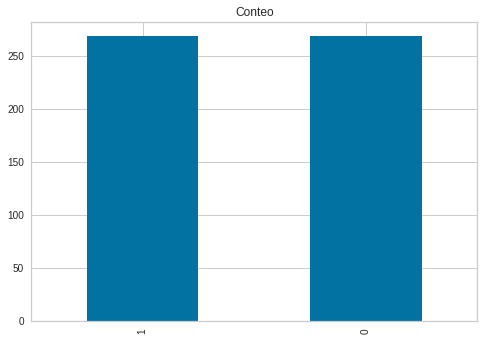

In [19]:
print('Under-sampling: Cluster Centroids')
print(y_cc.value_counts())
y_cc.value_counts().plot(kind='bar',title='Conteo')

In [20]:
dataset_cluster= X_cc
dataset_cluster['class']=y_cc
dataset_cluster.shape

(536, 9)

In [21]:
clf2= setup(data= dataset_cluster,target="class", session_id=123,silent=True)

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(536, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


**Regresion Logistica**

In [22]:
model2= create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7105,0.7694,0.6500,0.7647,0.7027,0.4242,0.4296
1,0.7368,0.8806,0.6500,0.8125,0.7222,0.4780,0.4888
2,0.7632,0.7472,0.8000,0.7619,0.7805,0.5237,0.5244
3,0.7105,0.7950,0.7368,0.7000,0.7179,0.4211,0.4216
4,0.6053,0.7230,0.6316,0.6000,0.6154,0.2105,0.2108
5,0.5676,0.6520,0.6316,0.5714,0.6000,0.1320,0.1327
6,0.7297,0.7427,0.7368,0.7368,0.7368,0.4591,0.4591
7,0.7838,0.8655,0.6842,0.8667,0.7647,0.5698,0.5834
8,0.7568,0.8392,0.7895,0.7500,0.7692,0.5124,0.5132
9,0.6216,0.6901,0.6316,0.6316,0.6316,0.2427,0.2427


**Arbol de Decision**

In [23]:
modelo2_1=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7632,0.7639,0.7500,0.7895,0.7692,0.5263,0.5270
1,0.7105,0.7139,0.6500,0.7647,0.7027,0.4242,0.4296
2,0.7368,0.7361,0.7500,0.7500,0.7500,0.4722,0.4722
3,0.6316,0.6316,0.5789,0.6471,0.6111,0.2632,0.2646
4,0.7105,0.7105,0.6316,0.7500,0.6857,0.4211,0.4264
5,0.4054,0.4035,0.4737,0.4286,0.4500,-0.1935,-0.1947
6,0.5405,0.5380,0.6316,0.5455,0.5854,0.0764,0.0774
7,0.7027,0.7003,0.7895,0.6818,0.7317,0.4023,0.4078
8,0.7297,0.7325,0.6316,0.8000,0.7059,0.4622,0.4733
9,0.5946,0.5965,0.5263,0.6250,0.5714,0.1921,0.1947


In [24]:
#Regresion Logistica
evaluate_model(model2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
#Arbol de Decision
evaluate_model(modelo2_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#ADASYN

In [26]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN(random_state=123).fit_resample(X, y)

ADASYN
0    500
1    474
Name: Outcome, dtype: int64


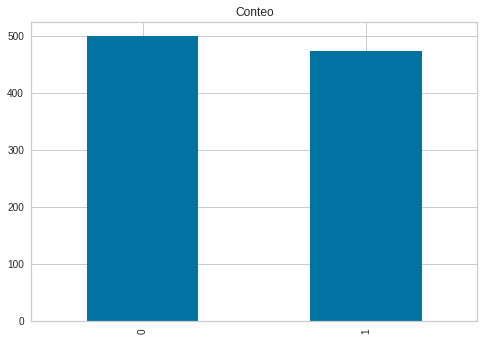

In [27]:
print('ADASYN')
print(y_resampled.value_counts())
y_resampled.value_counts().plot(kind='bar',title='Conteo')

In [28]:
dataset_ADASYN= X_resampled
dataset_ADASYN['class']=y_resampled
dataset_ADASYN.shape

(974, 9)

In [29]:
clf3= setup(data= dataset_ADASYN,target="class", session_id=123,silent=True)

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(974, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


**Regresion Logistica**

In [30]:
model3= create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6377,0.6928,0.6667,0.6111,0.6377,0.2767,0.2778
1,0.6912,0.8064,0.6875,0.6667,0.6769,0.3813,0.3814
2,0.7059,0.8073,0.6875,0.6875,0.6875,0.4097,0.4097
3,0.7206,0.8160,0.7188,0.6970,0.7077,0.4402,0.4404
4,0.6471,0.6736,0.5000,0.6667,0.5714,0.2817,0.2901
5,0.6029,0.7760,0.4688,0.6000,0.5263,0.1933,0.1977
6,0.8235,0.8351,0.8125,0.8125,0.8125,0.6458,0.6458
7,0.7059,0.7899,0.6250,0.7143,0.6667,0.4056,0.4085
8,0.7353,0.8368,0.7812,0.6944,0.7353,0.4724,0.4757
9,0.7794,0.8941,0.6250,0.8696,0.7273,0.5503,0.5715


**Arbol de Decision**

In [31]:
model3_1= create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.6667,0.6667,0.6471,0.6567,0.3329,0.3331
1,0.7059,0.7049,0.6875,0.6875,0.6875,0.4097,0.4097
2,0.6912,0.6840,0.5625,0.7200,0.6316,0.3726,0.3810
3,0.7794,0.7812,0.8125,0.7429,0.7761,0.5596,0.5618
4,0.6471,0.6406,0.5312,0.6538,0.5862,0.2842,0.2889
5,0.6471,0.6458,0.6250,0.6250,0.6250,0.2917,0.2917
6,0.6912,0.6875,0.6250,0.6897,0.6557,0.3770,0.3785
7,0.6765,0.6684,0.5312,0.7083,0.6071,0.3415,0.3518
8,0.7500,0.7535,0.8125,0.7027,0.7536,0.5026,0.5080
9,0.8235,0.8177,0.7188,0.8846,0.7931,0.6421,0.6526


In [32]:
# Regresion Logistica
evaluate_model(model3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

In [33]:
#Arbol de Decision
evaluate_model(model3_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…